## 첫 시험 성적과 성적상승량의 관계

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import scipy.stats as spst


In [2]:
file = 'toeic_preprocessed_data.csv'
base_data = pd.read_csv(file)

In [6]:
plt.rc('font', family='Malgun Gothic')
plt.rcParams['axes.unicode_minus'] = False

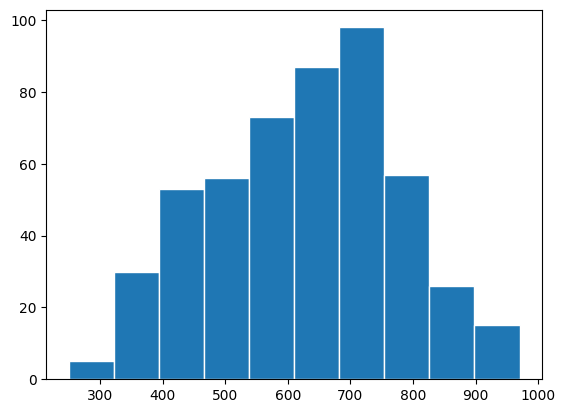

In [3]:
plt.hist(x = base_data['1st_Total_Score'], edgecolor = 'w')
plt.show()

In [4]:
bins = [-np.inf, 299, 399, 499, 599, 699, 799, np.inf]

## labels: 각 구간에 붙일 라벨
## 코드 입력
labels = ['300점 미만', '300점 대', '400점 대', '500점 대', '600점 대', '700점 대', '800점 이상']

## cut 함수 사용
## 코드 입력
base_data['1st_score_group'] = pd.cut(base_data['1st_Total_Score'],bins=bins,labels=labels)

## 데이터 확인
base_data.head()

,ID,Gender,Birth_Year,3rd_LC_Score,3rd_RC_Score,3rd_Total_Score,학습목표,학습방법,강의 학습 교재 유형,학습빈도,...,취약분야 인지 여부,토익 모의테스트 횟수,1st_LC_Score,1st_RC_Score,1st_Total_Score,2nd_LC_Score,2nd_RC_Score,2nd_Total_Score,Score_diff_total,1st_score_group
0,1,M,1973,345,336,681,승진,온라인강의,영상 교재,주5-6회,...,알고 있음,10,181,173,354,227,213,440,241,300점 대
1,2,F,1982,380,368,748,승진,온라인강의,뉴스/이슈 기반 교재,주5-6회,...,알고 있음,14,330,290,620,354,339,693,55,600점 대
2,3,F,1995,416,382,798,자기계발,참고서,일반적인 영어 텍스트 기반 교재,주1-2회,...,알고 있음,4,367,309,676,396,365,761,37,600점 대
3,4,M,1987,495,397,892,승진,온라인강의,뉴스/이슈 기반 교재,주3-4회,...,알고 있음,8,470,285,755,495,341,836,56,700점 대
4,5,M,1994,398,437,835,자기계발,온라인강의,영상 교재,주3-4회,...,알고 있음,4,273,372,645,314,426,740,95,600점 대


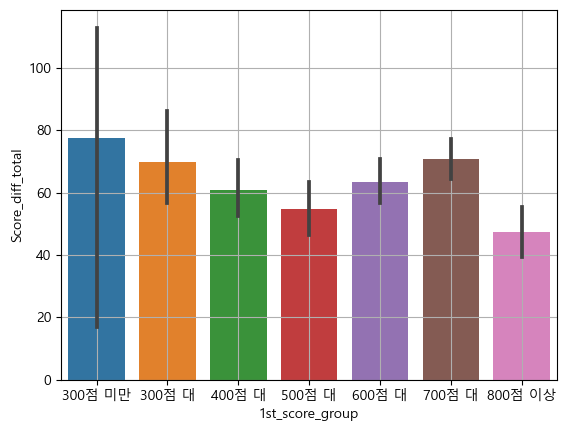

In [7]:
sns.barplot(x = '1st_score_group', y = 'Score_diff_total', data = base_data)
plt.grid()
plt.show()

In [8]:
target = 'Score_diff_total'
feature = '1st_score_group'

d1 = base_data.loc[base_data[feature] == base_data[feature].value_counts().index[0], target]
d2 = base_data.loc[base_data[feature] == base_data[feature].value_counts().index[1], target]
d3 = base_data.loc[base_data[feature] == base_data[feature].value_counts().index[2], target]
d4 = base_data.loc[base_data[feature] == base_data[feature].value_counts().index[3], target]
d5 = base_data.loc[base_data[feature] == base_data[feature].value_counts().index[4], target]
d6 = base_data.loc[base_data[feature] == base_data[feature].value_counts().index[5], target]
d7 = base_data.loc[base_data[feature] == base_data[feature].value_counts().index[6], target]

spst.f_oneway(d1, d2, d3, d4, d5, d6, d7)

F_onewayResult(statistic=3.221971454973718, pvalue=0.004098264050357915)

#### -> 첫 시험의 점수 대와 점수 상승량에 대한 상관관계를 살펴보았으나 유의미한 상관관계를 갖지 않는다.